In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
class SOM:
    def __init__(self, m, n, c=2, l=0.5, lamb=1, sigma=1) -> None:
        self.m = m
        self.n = n
        self.l = l
        self.c = c
        self.lamb = lamb
        self.sigma = sigma
        self.weights = np.random.rand(c, n)
        self.winners = [-1] * m
    
    def get_winner(self, sample):
        min_ind = -1
        min_dist = float('inf')
        for i in range(self.c):
            d = 0
            for j in range(self.n):
                d += math.pow((sample[j] - self.weights[i][j]), 2)
            if d < min_dist:
                min_ind = i
                min_dist = d
        return min_ind
    
    def update(self, sample, j, t):
        rate = self.__activation(sample, j, t)
        self.weights[j] = self.weights[j] + rate * (sample - self.weights[j])
    
    def train(self, data, epochs=3):
        for t in range(epochs):
            for j in range(self.m):
                sample = data[j]
                win = self.get_winner(sample)
                self.winners[j] = win
                self.update(sample, win, t)

    def __activation(self, sample, j, t):
        dist = 0
        for i in range(self.n):
            dist += math.pow((sample[i] - self.weights[j][i]), 2)
        exp_factor = math.exp(-1 * t / self.lamb)
        sigma = self.sigma * exp_factor

        theta = math.exp(-1 * dist / (2 * sigma * sigma))
        l_factor = self.l * exp_factor

        return theta * l_factor

In [3]:
X = np.array([
    np.array([1, 1, 0, 0]),
    np.array([0, 0, 0, 1]),
    np.array([1, 0, 0, 1]),
    np.array([0, 1, 1, 1])
])
som = SOM(len(X), len(X[0]))
som.train(X)
som.weights

array([[0.04400548, 0.35984508, 0.82091776, 0.48796375],
       [0.66766134, 0.11767237, 0.18118938, 0.89842689]])

In [4]:
s = np.array([0,0,0,1])
som.get_winner(s)

1

In [5]:
data = pd.read_csv("../data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
X = data.drop("Outcome", axis=1).to_numpy()
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [7]:
som = SOM(len(X), len(X[0]))
som.train(X)
som.weights

array([[0.97599216, 0.72697812, 0.90538086, 0.44574626, 0.04787332,
        0.44887495, 0.28251879, 0.15223315],
       [0.99646294, 0.43419227, 0.18289719, 0.07655727, 0.44715899,
        0.2324986 , 0.66729643, 0.63332529]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


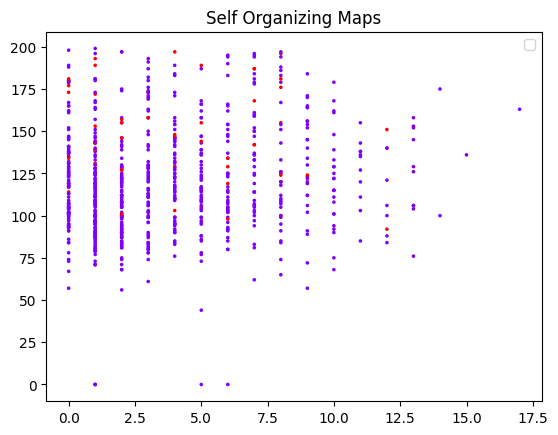

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=som.winners, cmap='rainbow', s=10, marker='.')
plt.title('Self Organizing Maps')
plt.legend()
plt.show()